<a href="https://colab.research.google.com/github/Lewis34cs/colab_practice/blob/main/pipeline_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import seaborn as sns
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.impute import SimpleImputer
import xgboost as xgb
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
df = sns.load_dataset('diamonds')

We can also read in files from our google drive

In [49]:
test = pd.read_csv('/content/drive/MyDrive/practice/data/bankrupt.csv')

In [50]:
test.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [51]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [52]:
for col in df.columns:
    print(df[col].value_counts())

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
2.70       1
3.67       1
5.01       1
2.77       1
3.40       1
Name: carat, Length: 273, dtype: int64
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
72.9       1
52.7       1
69.1       1
70.5       1
69.4       1
Name: depth, Length: 184, dtype: int64
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
61.3       1
61.6       1
64.3       1
61.8       1
63.3       1
Name: table, Length: 127, dtype: int64
605      132
802      127
625      126
828      125
776      124
        ... 
13550      1
1

In [53]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [54]:
X = df.drop('cut', axis=1)
y = df['cut']

In [55]:
df['depth'].dtype == 'float'

True

In [56]:
df['color'].dtype

CategoricalDtype(categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False)

### Train Test Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [58]:
y_train.value_counts()

Ideal        16163
Premium      10343
Very Good     9061
Good          3680
Fair          1208
Name: cut, dtype: int64

### Separating categorical and numerical features

In [59]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes not in ['float64', 'int64']]
cat_cols

['color', 'clarity']

In [60]:
num_cols = [col for col in X_train.columns if col not in cat_cols]
num_cols

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [61]:
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [62]:
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=0, strategy='mean')),
    ('scaler', StandardScaler())
])

In [63]:
preprocess = ColumnTransformer(transformers=[
    ('cat_cleaning', cat_pipe, cat_cols),
    ('num_cleaning', num_pipe, num_cols)
])

In [64]:
preprocess

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('cat_cleaning',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value='missing',
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0)),
                                                 ('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
             

In [65]:
y_train.value_counts(1)

Ideal        0.399530
Premium      0.255667
Very Good    0.223977
Good         0.090965
Fair         0.029860
Name: cut, dtype: float64

In [66]:
our_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('smote', SMOTE()),
    ('rf', RandomForestClassifier(max_depth=9))
])

TypeError: ignored

# OH NO!! IT BROKE!!!

In [67]:
# from imblearn.pipeline import Pipeline as imbpipeline

pipe_model = imbpipeline(steps=[
    ('preprocess', preprocess),
    ('smote', SMOTE()),
    ('rf', RandomForestClassifier())
])

In [68]:
pipe_model.fit(X_train, y_train)

pipe_model.score(X_train, y_train)

0.999901124706464

In [69]:
def evaluate_model(model, X, y):
    """
    Definition:
    Prints classification report and plots a confusion matrix of a model's 
    performance.
    
    Args:
    model - Model. Can also be a pipeline object.
    X - Features.
    y - Target.
    
    Returns:
    prints classification report and plots a confusion matrix
    """
    # creating predictions
    y_pred = model.predict(X)
    
    # printing classification report
    print(classification_report(y, y_pred))
    
    # plotting confusion matrix
    plot_confusion_matrix(model, X, y,cmap="Blues")
    
    

              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00      1208
        Good       1.00      1.00      1.00      3680
       Ideal       1.00      1.00      1.00     16163
     Premium       1.00      1.00      1.00     10343
   Very Good       1.00      1.00      1.00      9061

    accuracy                           1.00     40455
   macro avg       1.00      1.00      1.00     40455
weighted avg       1.00      1.00      1.00     40455



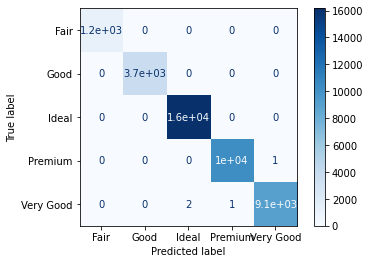

In [70]:
evaluate_model(pipe_model, X_train, y_train)

              precision    recall  f1-score   support

        Fair       0.86      0.90      0.88       402
        Good       0.69      0.74      0.71      1226
       Ideal       0.83      0.90      0.86      5388
     Premium       0.73      0.76      0.75      3448
   Very Good       0.63      0.47      0.54      3021

    accuracy                           0.76     13485
   macro avg       0.75      0.76      0.75     13485
weighted avg       0.75      0.76      0.75     13485



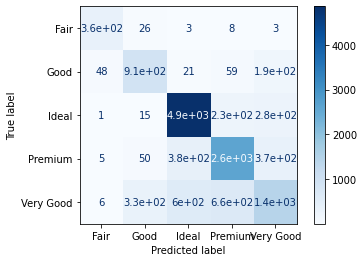

In [71]:
evaluate_model(pipe_model, X_test, y_test)

### Cross Validation

In [72]:
# def find_overfit(estimator, X, y, n_runs=100):
#     train_scores = []
#     test_scores = []
    
#     for i in range(n_runs):
#         rando = np.random.randint(1, 5000)
#         X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=rando)
        
#         cv_dict = cross_validate(estimator, X_tr, y_tr, return_train_score=True)
#         train_scores += cv_dict['train_score'].tolist()
#         test_scores += cv_dict['test_score'].tolist()
    
#     #Calculating bin size
#     bins = int(np.sqrt(len(train_scores)))
#     # Plotting distributions of both train and test scores
#     plt.figure(figsize=(10, 10))
#     plt.hist(train_scores, bins=bins, alpha=0.5, label='train scores')
#     plt.hist(test_scores, bins=bins, alpha=0.5, label='test scores')
#     plt.legend(loc='upper right')
#     plt.show()
    
#     avg_tr_score = sum(train_scores)/len(train_scores)
#     avg_te_score = sum(test_scores)/len(test_scores)
#     p_val = ttest_ind(equal_var=False, a=train_scores, b=test_scores)
    
#     print(p_val, avg_tr_score, avg_te_score)
    

In [73]:
#find_overfit(pipe_model, X, y, n_runs=10)

### Creating param grid for gridsearch

In [74]:
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [5, 9]
}

In [75]:
grid = GridSearchCV(pipe_model, param_grid, scoring='f1_macro', verbose=2)

In [76]:
start = time.time()
grid.fit(X_train, y_train)
print(time.time() - start, "seconds")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] rf__max_depth=5, rf__n_estimators=50 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. rf__max_depth=5, rf__n_estimators=50, total=   3.4s
[CV] rf__max_depth=5, rf__n_estimators=50 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ............. rf__max_depth=5, rf__n_estimators=50, total=   3.3s
[CV] rf__max_depth=5, rf__n_estimators=50 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=50, total=   3.2s
[CV] rf__max_depth=5, rf__n_estimators=50 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=50, total=   3.3s
[CV] rf__max_depth=5, rf__n_estimators=50 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=50, total=   3.2s
[CV] rf__max_depth=5, rf__n_estimators=100 ...........................
[CV] ............ rf__max_depth=5, rf__n_estimators=100, total=   5.3s
[CV] rf__max_depth=5, rf__n_estimators=100 ...........................
[CV] ............ rf__max_depth=5, rf__n_estimators=100, total=   5.3s
[CV] rf__max_depth=5, rf__n_estimators=100 ...........................
[CV] ............ rf__max_depth=5, rf__n_estimators=100, total=   5.4s
[CV] rf__max_depth=5, rf__n_estimators=100 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.8min finished


110.55713701248169 seconds


In [77]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat_cleaning',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                               

In [78]:
best_model = grid.best_estimator_

              precision    recall  f1-score   support

        Fair       0.88      0.89      0.89      1208
        Good       0.57      0.79      0.66      3680
       Ideal       0.80      0.93      0.86     16163
     Premium       0.65      0.83      0.73     10343
   Very Good       0.74      0.19      0.30      9061

    accuracy                           0.72     40455
   macro avg       0.73      0.73      0.69     40455
weighted avg       0.73      0.72      0.69     40455



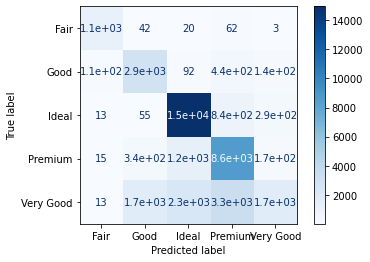

In [79]:
evaluate_model(best_model, X_train, y_train)

              precision    recall  f1-score   support

        Fair       0.86      0.86      0.86       402
        Good       0.54      0.75      0.63      1226
       Ideal       0.80      0.92      0.86      5388
     Premium       0.64      0.82      0.72      3448
   Very Good       0.68      0.16      0.26      3021

    accuracy                           0.71     13485
   macro avg       0.70      0.70      0.67     13485
weighted avg       0.71      0.71      0.67     13485



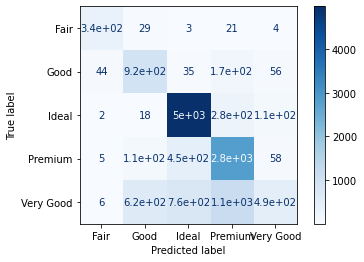

In [80]:
evaluate_model(best_model, X_test, y_test)

In [81]:
print(best_model.named_steps['rf'].feature_importances_)

[0.00122581 0.00202576 0.00305932 0.00147894 0.00330622 0.00111824
 0.00089016 0.01661961 0.00163557 0.00420231 0.00674973 0.00191641
 0.00338608 0.00220814 0.00328006 0.03852384 0.50324335 0.22968303
 0.02824037 0.04897667 0.04147076 0.05675962]


In [ ]:
raise Exception('Stop here')

In [ ]:
# Inspect our 'best_model' to see how to access the good stuff inside
best_model

In [ ]:
best_model. ...

In [ ]:
cat_ohe_cols = best_model.named_steps['preprocess'].named_transformers_['cat_cleaning'].named_steps['ohe'].get_feature_names(cat_cols).tolist()
cat_ohe_cols

['color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [ ]:
# remembering we save our num_cols in a variable
num_cols

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
feat_cols = num_cols + cat_ohe_cols
feat_cols

['carat',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [ ]:
X_train_tf = pd.DataFrame(best_model.named_steps['preprocess'].fit_transform(X_train), columns=feat_cols)
X_train_tf.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.524245,-0.803088,0.693520,0.407024,0.688573,0.731092,0.588038
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.986767,0.171312,1.141859,0.219612,1.045385,0.998824,1.026690
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.965743,-5.953485,1.590197,0.252097,1.518161,1.445043,0.559738
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.085442,-0.385488,-0.203157,-0.437578,0.108753,0.151007,0.078636
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.482198,0.449712,-0.651496,0.698137,0.661812,0.615075,0.687089


# What's going on here?

# Order is Important!

In [ ]:
feat_cols = cat_ohe_cols + num_cols
X_train_tf = pd.DataFrame(best_model.named_steps['preprocess'].fit_transform(X_train), columns=feat_cols)
X_train_tf.head()

,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,...,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,price,x,y,z
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.524245,-0.803088,0.693520,0.407024,0.688573,0.731092,0.588038
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.986767,0.171312,1.141859,0.219612,1.045385,0.998824,1.026690
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.965743,-5.953485,1.590197,0.252097,1.518161,1.445043,0.559738
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.085442,-0.385488,-0.203157,-0.437578,0.108753,0.151007,0.078636
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.482198,0.449712,-0.651496,0.698137,0.661812,0.615075,0.687089


In [ ]:
important_feats = pd.Series(best_model.named_steps['rf'].feature_importances_, 
                           index=feat_cols)

In [ ]:
important_feats.sort_values(ascending=False)[:5]

depth    0.320539
table    0.170648
x        0.090565
z        0.088472
y        0.086164
dtype: float64

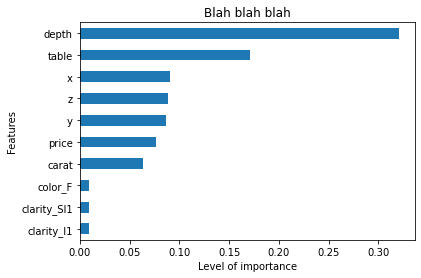

In [ ]:
top_feats = important_feats.sort_values(ascending=False).head(10)
plt.Figure(figsize=(5, 5))
top_feats.sort_values().plot(kind='barh')
plt.xlabel('Level of importance')
plt.ylabel('Features')
plt.title('Blah blah blah');

#### Super Basic example of a Function Transformer

In [ ]:
def inflate_price(X):
    new_X = X.copy()
    new_X['inflated_price'] = new_X['price'] + 100
    return new_X

In [ ]:
ft = FunctionTransformer(func=inflate_price)

In [ ]:
ft.fit_transform(X_train)